Checking Environment

In [1]:
import tensorflow as tf
print(tf.__version__)
import keras
print(keras.__version__)

2.20.0
3.12.0


Download and load Mnist dataset

In [2]:
from keras.datasets import mnist
(train_feature, train_label), (test_feature, test_label) = mnist.load_data()

In [3]:
print(len(train_feature), len(train_label))
print(len(test_feature), len(test_label))

60000 60000
10000 10000


In [4]:
print(train_feature.shape, train_label.shape)

(60000, 28, 28) (60000,)


Display the image and value of train data

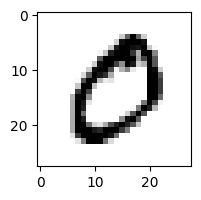

0


In [5]:
import matplotlib.pyplot as plt
def show_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()

show_image(train_feature[1])
print(train_label[1])

Function to display train and predict value 

In [6]:
def show_images_labels_predictions(images,labels,
                                  predictions,start_id,num=10):
    plt.gcf().set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        #顯示黑白圖片
        ax.imshow(images[start_id], cmap='binary')
        
        # 有 AI 預測結果資料, 才在標題顯示預測結果
        if( len(predictions) > 0 ) :
            title = 'ai = ' + str(predictions[start_id])
            # 預測正確顯示(o), 錯誤顯示(x)
            title += (' (o)' if predictions[start_id]==labels[start_id] else ' (x)') 
            title += '\nlabel = ' + str(labels[start_id])
        # 沒有 AI 預測結果資料, 只在標題顯示真實數值
        else :
            title = 'label = ' + str(labels[start_id])
            
        # X, Y 軸不顯示刻度    
        ax.set_title(title,fontsize=12) 
        ax.set_xticks([]);ax.set_yticks([])        
        start_id+=1 
    plt.show()

Diplay the first 10 data

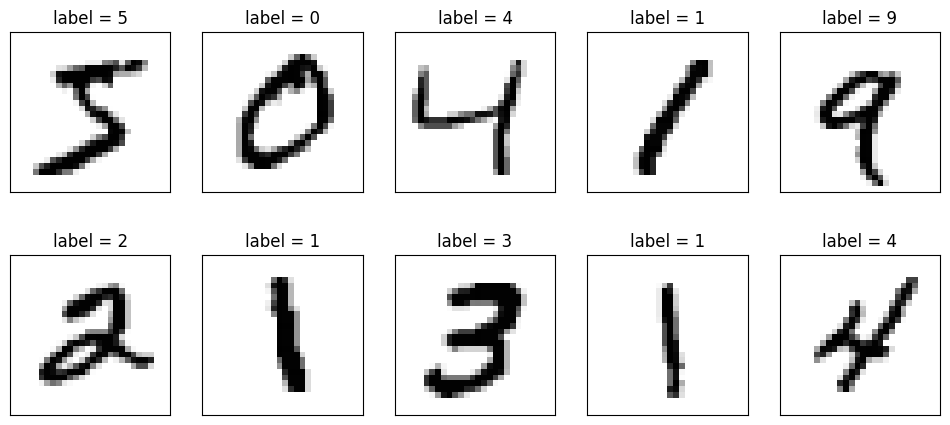

In [7]:
show_images_labels_predictions(train_feature, train_label, [], 0 , 10)

Another example to display image

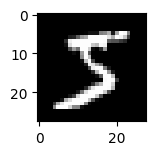

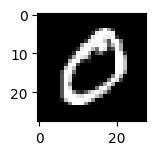

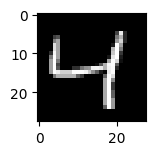

In [8]:
from matplotlib import pyplot
for i in range(3):  
   pyplot.subplot(330 + 1 + i)
   pyplot.imshow(train_feature[i], cmap=pyplot.get_cmap('gray'))
   pyplot.show()

Image convert from 28*28 (two dimension) to 784 vector (one dimension)

In [9]:
train_feature_vector =train_feature.reshape(len(train_feature), 784).astype('float32')
test_feature_vector = test_feature.reshape(len( test_feature), 784).astype('float32')

In [10]:
print(train_feature_vector.shape, test_feature_vector.shape)

(60000, 784) (10000, 784)


In [11]:
print(train_feature_vector[0])

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.  94. 154. 170. 253.
 253. 253. 253. 253. 225. 172. 253. 242. 195.  64.   0.   0.   0.   0.
   0. 

Normalize the data between 0 and 1

In [12]:
train_feature_normalize = train_feature_vector/255
test_feature_normalize = test_feature_vector/255

In [13]:
print(train_feature_normalize[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

preparation of label (change from value to one-hot encoding)

In [14]:
print(train_label[0:5])

[5 0 4 1 9]


In [15]:
from tensorflow.keras.utils import to_categorical
train_label_onehot = to_categorical(train_label)
test_label_onehot = to_categorical(test_label)

In [16]:
print(train_label_onehot[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


Build Sequential Model (https://keras.io/guides/sequential_model/) 
one layer - Input
one layer - Hidden (Dense)

In [17]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

Set model training method
compile method


In [18]:
model.add(Dense(units=256, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\lchla\anaconda3\envs\tensorflowenv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


run training 
fit method

In [19]:
train_history =model.fit(x=train_feature_normalize, y=train_label_onehot,validation_split=0.2, epochs=10, batch_size=200,verbose=2)

Epoch 1/10
240/240 - 1s - 6ms/step - accuracy: 0.8845 - loss: 0.4369 - val_accuracy: 0.9377 - val_loss: 0.2235
Epoch 2/10
240/240 - 1s - 2ms/step - accuracy: 0.9461 - loss: 0.1891 - val_accuracy: 0.9560 - val_loss: 0.1572
Epoch 3/10
240/240 - 1s - 3ms/step - accuracy: 0.9613 - loss: 0.1338 - val_accuracy: 0.9626 - val_loss: 0.1323
Epoch 4/10
240/240 - 1s - 3ms/step - accuracy: 0.9718 - loss: 0.1016 - val_accuracy: 0.9675 - val_loss: 0.1109
Epoch 5/10
240/240 - 1s - 3ms/step - accuracy: 0.9780 - loss: 0.0792 - val_accuracy: 0.9703 - val_loss: 0.1000
Epoch 6/10
240/240 - 1s - 3ms/step - accuracy: 0.9822 - loss: 0.0654 - val_accuracy: 0.9724 - val_loss: 0.0916
Epoch 7/10
240/240 - 1s - 3ms/step - accuracy: 0.9857 - loss: 0.0525 - val_accuracy: 0.9740 - val_loss: 0.0874
Epoch 8/10
240/240 - 1s - 3ms/step - accuracy: 0.9879 - loss: 0.0441 - val_accuracy: 0.9739 - val_loss: 0.0870
Epoch 9/10
240/240 - 1s - 3ms/step - accuracy: 0.9900 - loss: 0.0364 - val_accuracy: 0.9758 - val_loss: 0.0824
E

evaluate the accurancy

In [20]:
scores = model.evaluate(test_feature_normalize, test_label_onehot)
print('\n準確率=',scores[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9788 - loss: 0.0701  

準確率= 0.9787999987602234


Predict

In [21]:
import numpy as np
prediction=np.argmax(model.predict(test_feature_normalize), axis=-1)
prediction[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step


np.int64(7)

In [22]:
test_label_onehot[0]



array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [23]:
test_label[0]

np.uint8(7)

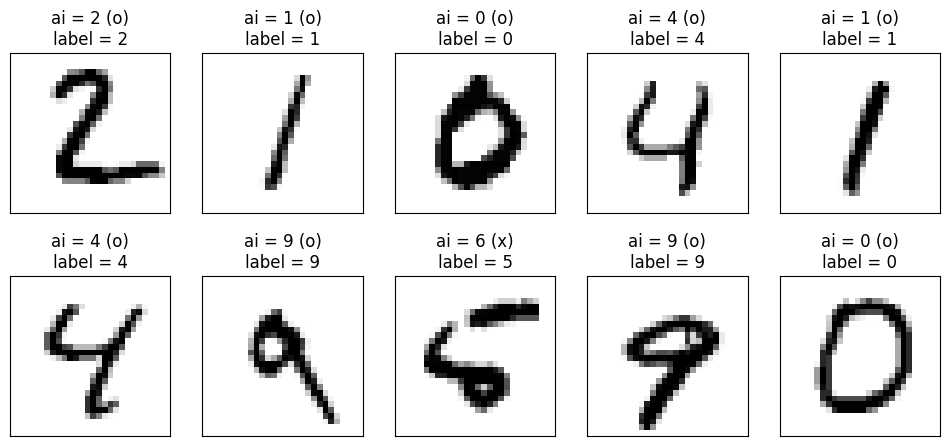

In [26]:
show_images_labels_predictions(test_feature, test_label, prediction, 1 )

Save and delete model

In [27]:
model.save('Mnist_mlp_model.keras')
print("Mnist_mlp_model.h5 模型儲存完畢!")
del model   

Mnist_mlp_model.h5 模型儲存完畢!
